In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from idskicker.config import data_dir
plt.style.use("seaborn-darkgrid")
plt.rcParams["figure.figsize"] = (10,8)
sns.set_style("darkgrid")

df = pd.read_csv(data_dir / 'processed' / '02-ks-projects-engineered.csv')

In [2]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'deadline_year', 'deadline_month', 'deadline_day',
       'launched_year', 'launched_month', 'launched_day', 'launched_hour',
       'launched_minute', 'name_length', 'name_words',
       'launched_to_deadline_days'],
      dtype='object')

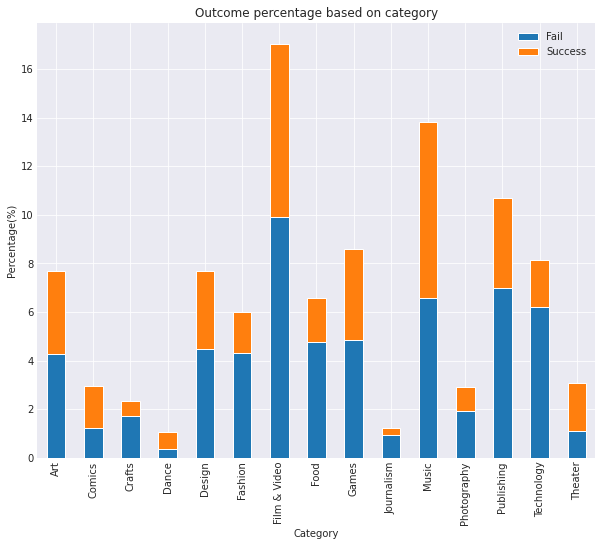

In [4]:
ax = pd.crosstab(df["main_category"], df["state"], normalize=True).apply(lambda x: x * 100).plot.bar(stacked=True)
ax.set_title("Outcome percentage based on category")
ax.set_xlabel("Category")
ax.set_ylabel("Percentage(%)")
ax.legend(labels=["Fail", "Success"])

## How title affects the outcome of the project

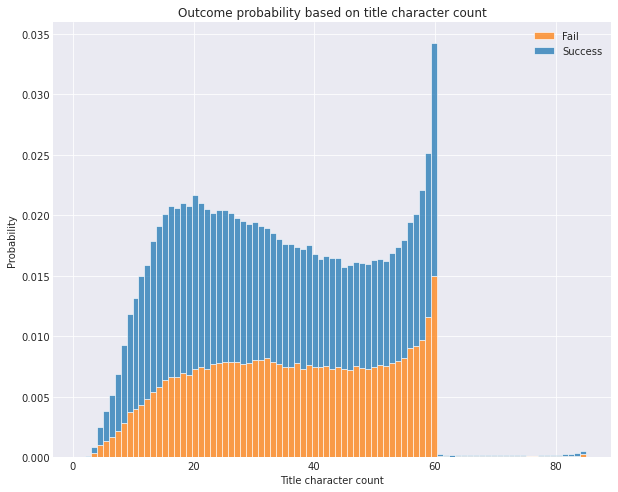

In [69]:
ax = sns.histplot(data=df, x="name_length", hue="state", multiple="stack", stat="probability", bins=85)
ax.set_title("Outcome probability based on title character count")
ax.set_xlabel("Title character count")
ax.legend(labels=["Fail", "Success"])

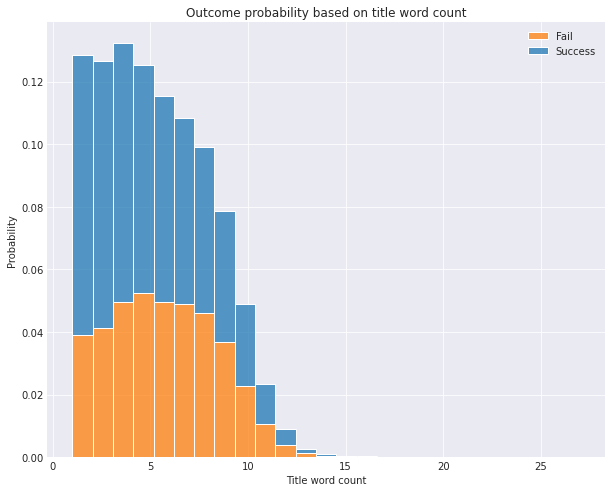

In [68]:
ax = sns.histplot(data=df, x="name_words", hue="state", multiple="stack", stat="probability", bins=25)
ax.set_title("Outcome probability based on title word count")
ax.set_xlabel("Title word count")
ax.legend(labels=["Fail", "Success"])

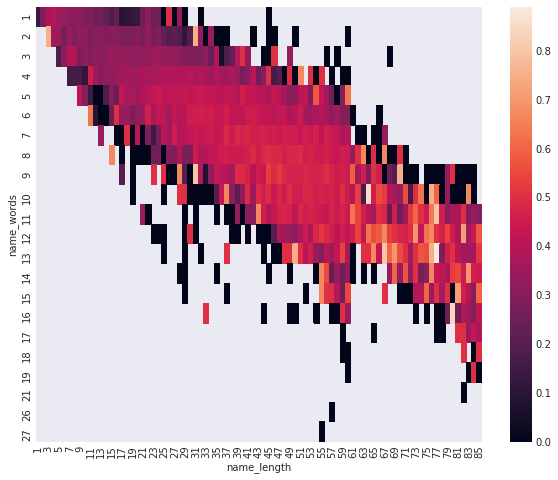

In [77]:
rows = df.shape[0]

def custom_aggregator(series):
    val_counts = series.value_counts()
    if "successful" not in val_counts or "failed" not in val_counts:
        return 0
    series_len = len(series)
    return (val_counts["successful"] / series_len) 

ct = pd.crosstab(df["name_words"], df["name_length"], values=df["state"], aggfunc=custom_aggregator)
sns.heatmap(ct)

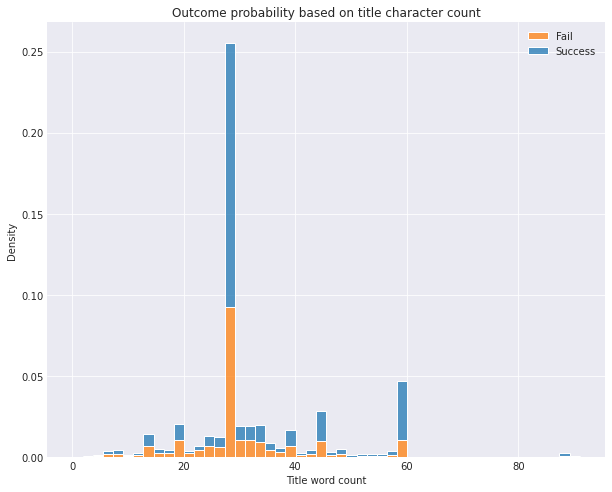

In [7]:
ax = sns.histplot(data=df, x="launched_to_deadline_days", hue="state", multiple="stack", stat="density", bins=50)
ax.set_title("Outcome probability based on title character count")
ax.set_xlabel("Title word count")
ax.legend(labels=["Fail", "Success"])

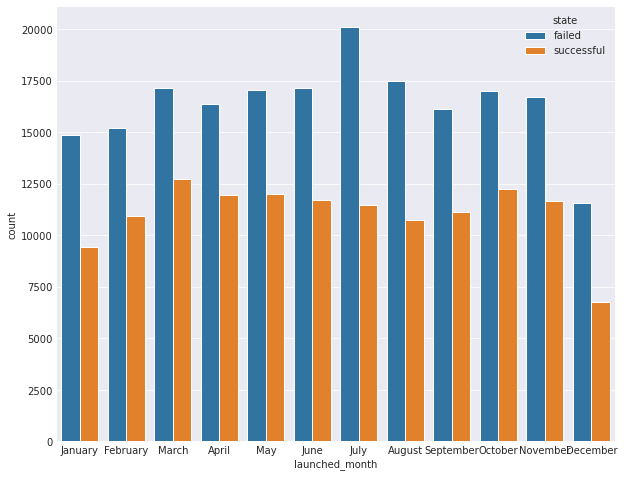

In [8]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
sns.countplot(data=df, x="launched_month", hue="state", order=months)

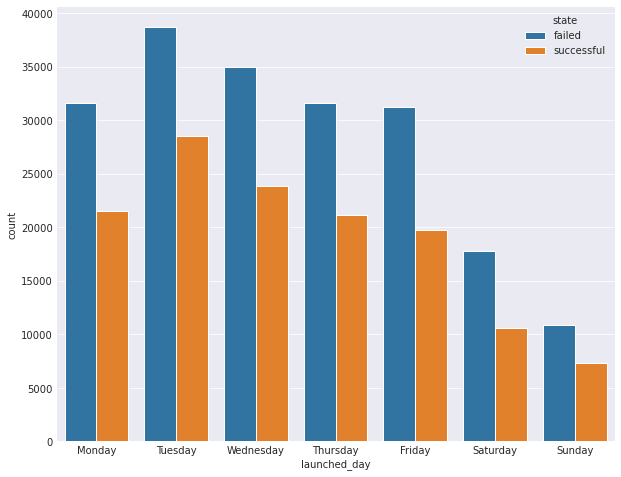

In [9]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=df, x="launched_day", hue="state", order=days)

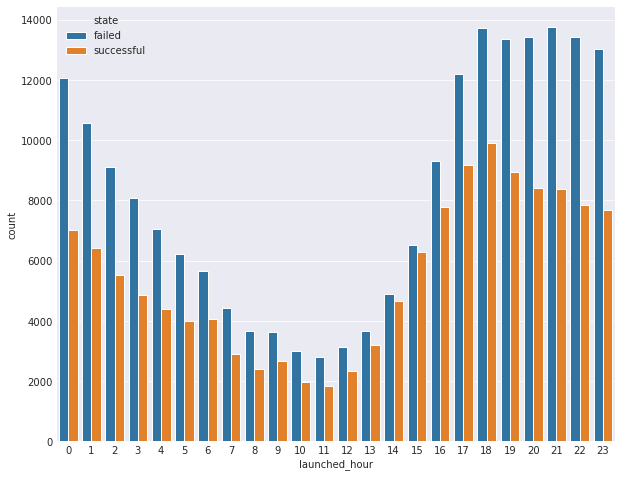

In [10]:
sns.countplot(data=df, x="launched_hour", hue="state")

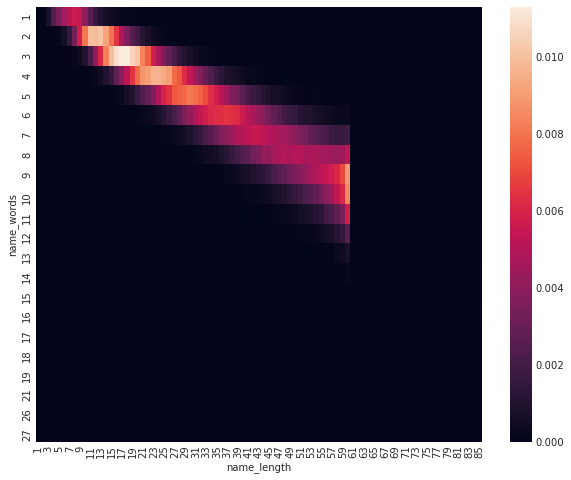

In [21]:
ct = pd.crosstab(df["name_words"], df["name_length"], values=df["state"], aggfunc="count", normalize=True)
sns.heatmap(ct)

/home/emil/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


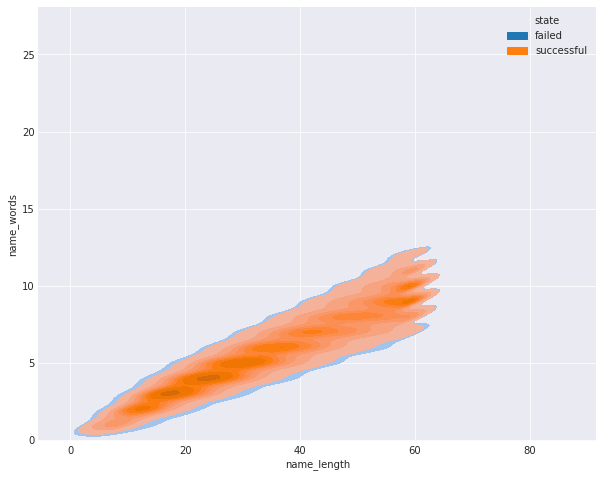

In [22]:
sns.kdeplot(data=df, x="name_length", y="name_words", hue="state", fill=True, bins=30)

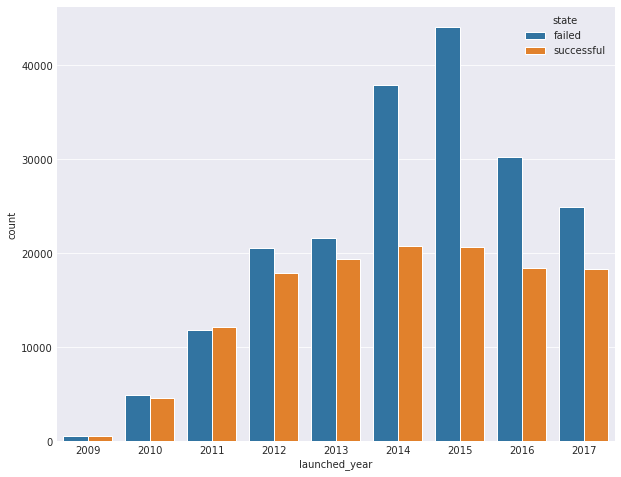

In [10]:
sns.countplot(x="launched_year", data=df, hue="state")

In [4]:
df.tail()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,...,deadline_month,deadline_day,launched_year,launched_month,launched_day,launched_hour,launched_minute,name_length,name_words,launched_to_deadline_days
329416,999975836,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,2017-04-19,2017-03-20 22:08:22,failed,4,US,...,April,Wednesday,2017,March,Monday,22,8,37,6,29
329417,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,5,US,...,July,Tuesday,2011,June,Wednesday,3,35,9,2,26
329418,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,1,US,...,August,Monday,2010,July,Thursday,19,40,71,11,45
329419,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,2016-01-13 18:13:53,failed,6,US,...,February,Saturday,2016,January,Wednesday,18,13,24,3,30
329420,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2011-07-19 09:07:47,failed,17,US,...,August,Tuesday,2011,July,Tuesday,9,7,33,6,27
